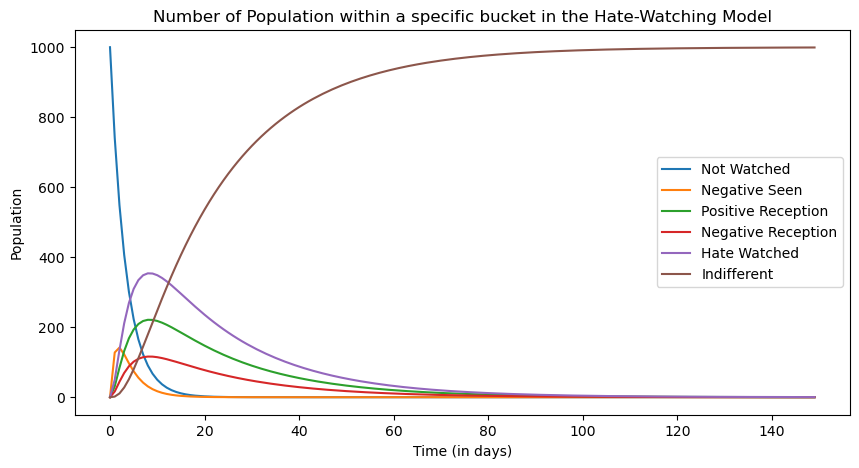

Peak Positive Seen:  35.447058391588044
Peak Day:  2
Peak Negative Seen:  141.78823356635218
Peak Day:  2

Peak Positive Reception:  221.2364942368112
Peak Day:  8
Peak Negative Reception:  116.14915947432584
Peak Day:  8
Peak HateWatched Reception:  353.97839077889813
Peak Day:  8

Peak Indifference Reception:  999.2655471718389
Peak Day:  149


In [116]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

t_end = 150
t = np.arange(0, t_end, 1)

# Parameters
with open('params.json', 'r') as f: 
    parameters = json.loads(f.read())

# Initial Condition
NW0 = parameters['InitialPopulation']

PR0 = 0         # Amount of People who have seen mostly positive reviews about the movie
NR0 = 0         # Amount of People who have seen mostly negative reviews about the movie

PP0 = 0         # Amount of People who have seriously positive reception
NP0 = 0         # Amount of People who have seriously negative reception
HW0 = 0         # Amount of People who have hate-watched

I0 = 0          # Amount of People who have become indifferent

# ODE System
def model(t, y):
    NW, PR, NR, PP, NP, HW, I = y
    dNWdt = -NW*parameters['ProbSeeingReview']

    dPRdt = parameters['ProbSeeingPositiveReview']*parameters['ProbSeeingReview']*NW - PR
    dNRdt = (1-parameters['ProbSeeingPositiveReview'])*parameters['ProbSeeingReview']*NW - NR

    dPPdt = parameters['ProbStayingSameReception']*PR + \
            (1-parameters['ProbStayingSameReception'])*NR - \
            parameters['ProbIndifference']*PP
    
    # Assuming Hate Watching and Negative Review is Mutually independent events
    dNPdt = (1-parameters['ProbStayingSameReception'])*PR + \
            (parameters['ProbStayingSameReception'])*NR - \
            (parameters['ProbStayingSameReception']*parameters['ProbHateWatching'])*NR - \
            parameters['ProbIndifference']*NP
    
    dHWdt = (parameters['ProbStayingSameReception']*parameters['ProbHateWatching'])*NR - \
            parameters['ProbIndifference']*HW

    dIdt = parameters['ProbIndifference']*(PP+NP+HW)
    return [dNWdt, dPRdt, dNRdt, dPPdt, dNPdt, dHWdt, dIdt]


sol = solve_ivp(model, [t[0], t[-1]], [NW0, PR0, NR0, PP0, NP0, HW0, I0], t_eval=t)

plt.figure(figsize=(10, 5))
plt.plot(t, sol.y[0], label="Not Watched")

# plt.plot(t, sol.y[1], label="Positive Seen")
plt.plot(t, sol.y[2], label="Negative Seen")

plt.plot(t, sol.y[3], label="Positive Reception")
plt.plot(t, sol.y[4], label="Negative Reception")
plt.plot(t, sol.y[5], label="Hate Watched")

plt.plot(t, sol.y[6], label="Indifferent")

plt.xlabel("Time (in days)")
plt.ylabel("Population")
plt.title("Number of Population within a specific bucket in the Hate-Watching Model")
plt.legend()
plt.show()

print("Peak Positive Seen: ", sol.y[1].max())
print("Peak Day: ", t[sol.y[1].argmax()])

print("Peak Negative Seen: ", sol.y[2].max())
print("Peak Day: ", t[sol.y[2].argmax()])

print()

print("Peak Positive Reception: ", sol.y[3].max())
print("Peak Day: ", t[sol.y[3].argmax()])

print("Peak Negative Reception: ", sol.y[4].max())
print("Peak Day: ", t[sol.y[4].argmax()])

print("Peak HateWatched Reception: ", sol.y[5].max())
print("Peak Day: ", t[sol.y[5].argmax()])

print()

print("Peak Indifference Reception: ", sol.y[6].max())
print("Peak Day: ", t[sol.y[6].argmax()])